<a href="https://colab.research.google.com/github/nklbigone/DIC-ML/blob/main/Sprint6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[Problem 1] Function for finding impureness**

Create a function to calculate the Gini impureness of a​ ​node. The Gini impure $ I (t) $ for the node $ t $ can be calculated by the following formula. The more mixed the classes, the higher the Gini purity.


\ [I (t) = 1- \ sum_ {i = 1} ^ {K} P ^ 2 (C_i | t) = 1- \ sum_ {i = 1} ^ {K} (\ frac {N_ {t,, i}} {N_ {t, all}}) ^ {2} \]
$ t $: Node index


$ i $: Class index


$ K $: Number of classes


$ C_i $: i-th class


$ P (C_i | t) $: Percentage of $ C_i $ at the t-th node


$ N_ {t, i} $: Number of samples belonging to the i-th class of the t-th node


$ N_ {t, all} $: Total number of samples for the t-th node



## **[Problem 2] Function for finding information gain**

Next, create a function that calculates the information gain between the nodes. Call and use the function that calculates the Gini impure $ I (t) $ created in Problem 1. The information gain $ IG $ can be calculated by the following formula. The better the division, the greater the information gain.


Since there are only two branches here, the branch destination is called the "left node / right node".


\ [IG (p) = I (p)-\ frac {N_ {left, all}} {N_ {p, all}} I (left)-\ frac {N_ {right, all}} {N_ {p, all}} I (right) \]
$ p $: Index indicating the parent node


$ left $: Index indicating the node on the left


$ right $: Index indicating the right node

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        number_of_features = X.shape[1]
        self.best_gain = 0
        for i in range(number_of_features):
            candidate_threshold = np.unique(X[:,i])
            
            for threshold in candidate_threshold:
                left = y[X[:,i] < threshold]
                right = y[X[:,i] >= threshold]
                
                split_info_gain = self._information_gain(y,left,right)
                
                if split_info_gain > self.best_gain:
                    self.left_label = statistics.mode(left)
                    self.right_label = statistics.mode(right)
                    self.threshold = threshold
                    self.feature_chosen = i
                    self.best_gain = split_info_gain
                    
                    if self.verbose:
                        print("feature: {}, information_gain: {}".format(self.feature_chosen,self.best_gain))
        
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        return np.where(X[:,self.feature_chosen] < self.threshold,self.left_label,self.right_label)
    
    def _gini(self,node):
        """
        Function to calculate gini impurity of a node
        Parameters
        -------
        node: nd_array shape(n_smaples,1)
        Output
        --------
        Gini impurity of a node
        """
        samples,counts = np.unique(node, return_counts=True)
        result = 1
        node_count = len(node)
        for count in counts:
            result -= (count / node_count)**2
        return result
    
    def _information_gain(self, parent, left, right):
        """
        Calculate information gain of a specific division using gini impurity
        Parameters
        ---------
        parent, left,right: parent, left, right node of the split, ndarray shape (number_of_samples,1)
        Output
        ---------
        Information gain of the division
        """
        parent_gini = self._gini(parent)
        left_gini = (self._gini(left) * len(left)) / len(parent)
        right_gini = (self._gini(right) * len(right)) / len(parent)
        return parent_gini - left_gini - right_gini


## **[Problem 3] Learning**

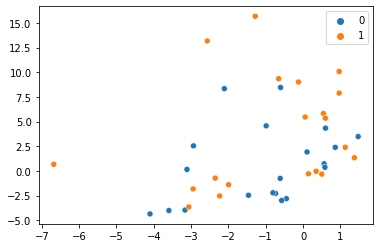

In [3]:
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,train_size =0.75)

## **[Question 4] Presumption**

In [5]:
model = ScratchDecesionTreeClassifierDepth1(verbose=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

feature: 0, information_gain: 0.01501915708812257
feature: 0, information_gain: 0.020992063492063423
feature: 0, information_gain: 0.03865258924082446
feature: 0, information_gain: 0.06259259259259262
feature: 0, information_gain: 0.09395002658160546
feature: 1, information_gain: 0.12126262626262618
[0 1 1 0 1 1 1 0 1 1]


## **[Problem 5] Learning and estimation**

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate(y_pred, y_test):
  print("accuracy: {}".format(accuracy_score(y_test,y_pred)))
  print("precision: {}".format(precision_score(y_test,y_pred)))
  print("recall: {}".format(recall_score(y_test,y_pred)))
  print("f1: {}".format(f1_score(y_test,y_pred)))

In [10]:
evaluate(y_pred,y_test)

accuracy: 0.3
precision: 0.2857142857142857
recall: 0.5
f1: 0.36363636363636365


In [11]:
from sklearn.tree import DecisionTreeClassifier
model_sk = DecisionTreeClassifier(max_depth=1)
model_sk.fit(X_train,y_train)
y_pred_sk = model_sk.predict(X_test)
evaluate(y_pred_sk,y_test)

accuracy: 0.3
precision: 0.2857142857142857
recall: 0.5
f1: 0.36363636363636365


## **[Problem 6] Visualization of decision area**

if we take closer the result of scratch model and model imported from sklearn are the same, but the tree model was the one which was generated once branch at time.

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['1', '-1']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'green']
    n_class = 2
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()

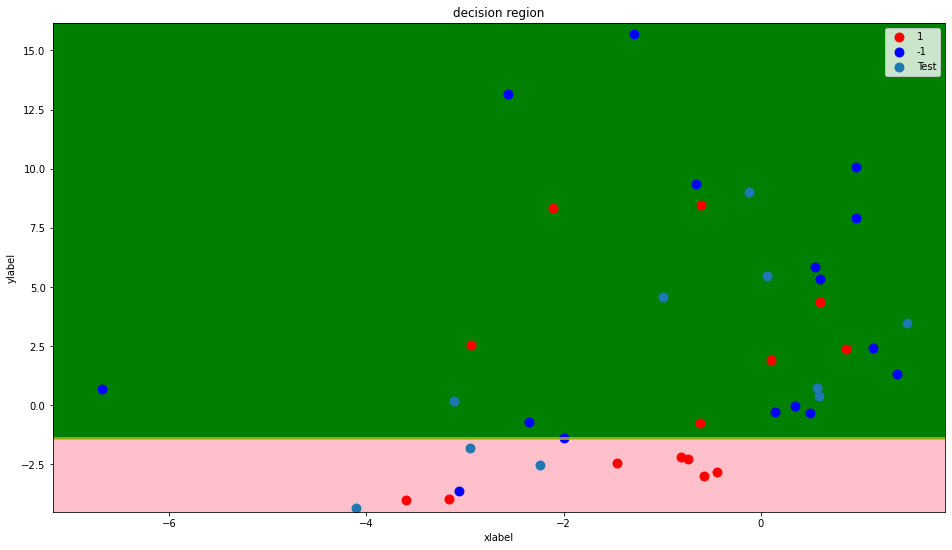

In [13]:
fig, ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();

## **[Problem 7-8]**

In [14]:
class DecisionTreeNode():
    """
    Data structure to represent a node in a decision tree
    """
    def __init__(self, verbose=False,max_depth=None):
        self.verbose = verbose
        self.max_depth = max_depth   
    def _tree_contruct(self,X,y,depth=None):
        """
        Determine the split and generate two node left and right
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        
        if len(np.unique(y)) == 1 or depth == self.max_depth:
            self.label = statistics.mode(y)
            return
            
        number_of_features = X.shape[1]
        self.best_gain = 0
        for i in range(number_of_features):
            candidate_threshold = np.unique(X[:,i])
            
            for threshold in candidate_threshold:
                left = y[X[:,i] < threshold]
                right = y[X[:,i] >= threshold]
                
                split_info_gain = self._information_gain(y,left,right)
                
                if split_info_gain > self.best_gain:
                    self.threshold = threshold
                    self.feature_chosen = i
                    self.best_gain = split_info_gain
                    
                    if self.verbose:
                        print("depth: {}, feature: {}, information_gain: {}".format(depth,self.feature_chosen,self.best_gain))
                        
        self.label = None
        self.left_node = DecisionTreeNode(verbose=self.verbose, max_depth=self.max_depth)
        self.left_node._tree_contruct(X=X[X[:,self.feature_chosen] < self.threshold],y=y[X[:,self.feature_chosen] < self.threshold],depth=depth+1)
        self.right_node = DecisionTreeNode(verbose=self.verbose,  max_depth=self.max_depth)
        self.right_node._tree_contruct(X=X[X[:,self.feature_chosen] >= self.threshold],y=y[X[:,self.feature_chosen] >= self.threshold],depth=depth+1)
        
        
    def predict(self, X):
        """
        Estimate the label of a sample by traverse node in a decision tree classifier
        """
        if self.label is None:
            if X[self.feature_chosen] < self.threshold:
                return self.left_node.predict(X)
            else:
                return self.right_node.predict(X)
        else:
            return self.label
        
    def _gini(self,node):
        """
        Function to calculate gini impurity of a node
        Parameters
        -------
        node: nd_array shape(n_smaples,1)
        Output
        --------
        Gini impurity of a node
        """
        samples,counts = np.unique(node, return_counts=True)
        result = 1
        node_count = len(node)
        for count in counts:
            result -= (count / node_count)**2
        return result
    
    def _information_gain(self, parent, left, right):
        """
        Calculate information gain of a specific division using gini impurity
        Parameters
        ---------
        parent, left,right: parent, left, right node of the split, ndarray shape (number_of_samples,1)
        Output
        ---------
        Information gain of the division
        """
        parent_gini = self._gini(parent)
        left_gini = (self._gini(left) * len(left)) / len(parent)
        right_gini = (self._gini(right) * len(right)) / len(parent)
        return parent_gini - left_gini - right_gini

In [15]:
class ScratchDecesionTreeClassifier():
    """
    Decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False,max_depth=None):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = max_depth
    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        self.root = DecisionTreeNode(verbose=self.verbose,max_depth=self.max_depth)
        self.root._tree_contruct(X,y,0)
        
        
    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        result = np.zeros(len(X))
        for i,sample in enumerate(X):
            result[i] = self.root.predict(sample)
        return result
        

In [16]:
model = ScratchDecesionTreeClassifier(verbose=True,max_depth=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

depth: 0, feature: 0, information_gain: 0.01501915708812257
depth: 0, feature: 0, information_gain: 0.020992063492063423
depth: 0, feature: 0, information_gain: 0.03865258924082446
depth: 0, feature: 0, information_gain: 0.06259259259259262
depth: 0, feature: 0, information_gain: 0.09395002658160546
depth: 0, feature: 1, information_gain: 0.12126262626262618
depth: 1, feature: 0, information_gain: 0.004464285714285643
depth: 1, feature: 0, information_gain: 0.01041666666666674
depth: 1, feature: 0, information_gain: 0.052083333333333315
depth: 1, feature: 0, information_gain: 0.009641873278236957
depth: 1, feature: 0, information_gain: 0.011157024793388426
depth: 1, feature: 0, information_gain: 0.037190082644628114
depth: 1, feature: 0, information_gain: 0.04499540863177226
[0. 1. 1. 0. 1. 1. 1. 0. 1. 1.]


In [17]:
evaluate(y_pred,y_test)

accuracy: 0.3
precision: 0.2857142857142857
recall: 0.5
f1: 0.36363636363636365


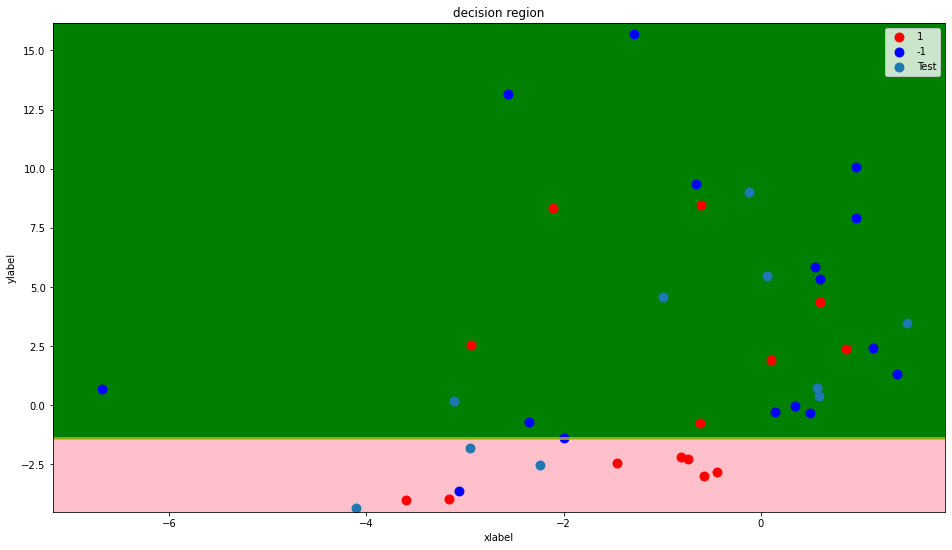

In [18]:
fig, ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();

In [19]:
model = ScratchDecesionTreeClassifier(verbose=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

depth: 0, feature: 0, information_gain: 0.01501915708812257
depth: 0, feature: 0, information_gain: 0.020992063492063423
depth: 0, feature: 0, information_gain: 0.03865258924082446
depth: 0, feature: 0, information_gain: 0.06259259259259262
depth: 0, feature: 0, information_gain: 0.09395002658160546
depth: 0, feature: 1, information_gain: 0.12126262626262618
depth: 1, feature: 0, information_gain: 0.004464285714285643
depth: 1, feature: 0, information_gain: 0.01041666666666674
depth: 1, feature: 0, information_gain: 0.052083333333333315
depth: 2, feature: 0, information_gain: 0.11111111111111116
depth: 2, feature: 0, information_gain: 0.4444444444444445
depth: 1, feature: 0, information_gain: 0.009641873278236957
depth: 1, feature: 0, information_gain: 0.011157024793388426
depth: 1, feature: 0, information_gain: 0.037190082644628114
depth: 1, feature: 0, information_gain: 0.04499540863177226
depth: 2, feature: 0, information_gain: 0.017792302106027502
depth: 2, feature: 0, information_

In [20]:
evaluate(y_pred,y_test)

accuracy: 0.3
precision: 0.2857142857142857
recall: 0.5
f1: 0.36363636363636365


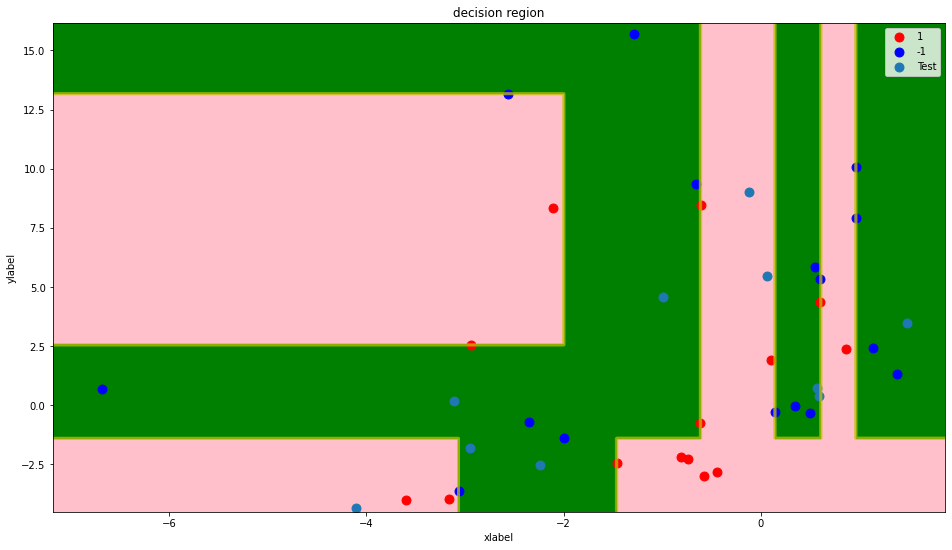

In [21]:
fig, ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,model)
plt.scatter(X_test[:,0], X_test[:,1], s=80, label="Test")
plt.legend();